<a href="https://colab.research.google.com/github/innysik222/Python-Libs/blob/main/Kalinina_Inna_%22Project2_Classification_model_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1858]:
 #!pip install xgboost
 !pip install lightgbm
 !pip install catboost

In [1859]:
import numpy as np
import pickle
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

In [1860]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (roc_auc_score, roc_curve, auc, confusion_matrix, \
                             accuracy_score, classification_report, plot_confusion_matrix, \
                             plot_precision_recall_curve, precision_recall_curve, recall_score,
                             plot_roc_curve)

In [1861]:
TRAIN_DF_PATH=('/content/drive/MyDrive/Тренировочные данные/Scoring model project (classification)/course_project_train.csv')
TEST_DF_PATH=('/content/drive/MyDrive/Тренировочные данные/Scoring model project (classification)/course_project_test.csv')
MODEL_FILE_PATH = '../model.pkl'

In [1862]:
train_df=pd.read_csv(TRAIN_DF_PATH)
train_copy=train_df.copy()
test_df=pd.read_csv(TEST_DF_PATH)

Home Ownership - домовладение
Annual Income - годовой доход
Years in current job - количество лет на текущем месте работы
Tax Liens - налоговые обременения
Number of Open Accounts - количество открытых счетов
Years of Credit History - количество лет кредитной истории
Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
Number of Credit Problems - количество проблем с кредитом
Months since last delinquent - количество месяцев с последней просрочки платежа
Bankruptcies - банкротства
Purpose - цель кредита
Term - срок кредита
Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
Monthly Debt - ежемесячный долг
Credit Score - баллы кредитного рейтинга
Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1863]:
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [1864]:
test_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [1865]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [1866]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [1867]:
Num_features_train=train_df.select_dtypes(include='float64').columns
Num_features_test=test_df.select_dtypes(include='float64').columns
Num_features_train

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score'],
      dtype='object')

**Обработка выбросов**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90fa7c9250>,
      dtype=object)

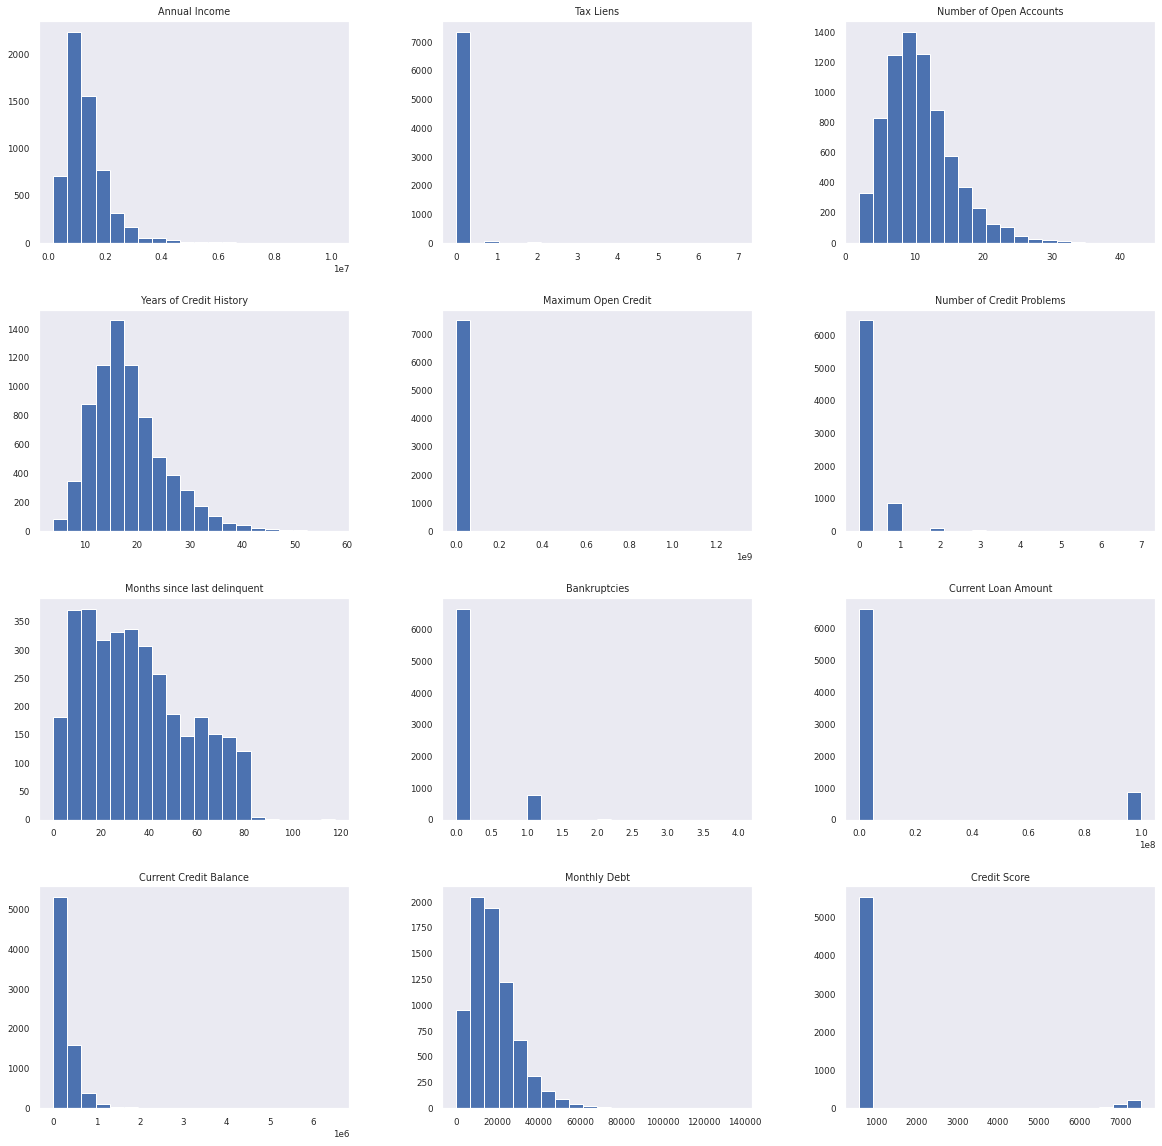

In [1868]:
train_df[Num_features_train].hist(figsize=(20,20), bins=20, grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90f967ef10>,
      dtype=object)

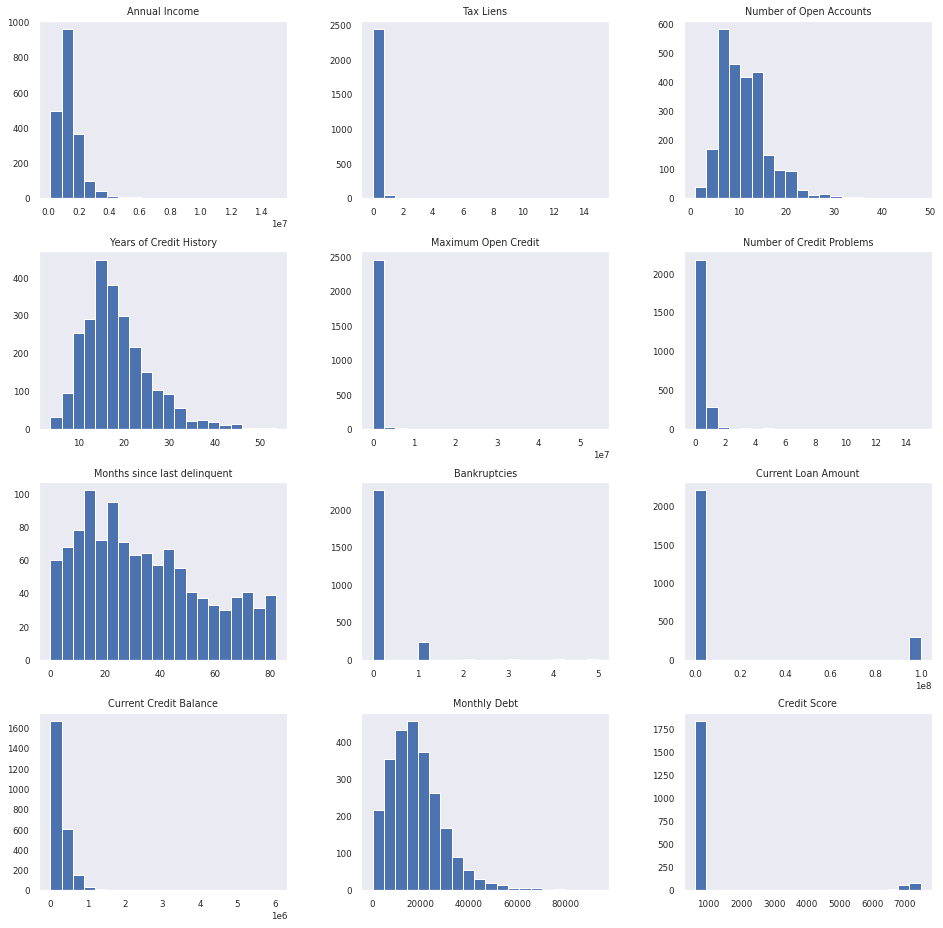

In [1869]:
test_df[Num_features_test].hist(figsize=(16,16), bins=20, grid=False)

Исходя из графиков, выбросы присутствуют в признаках: Annual Income, Number of Open accounts,   Current Credit Ballance, Monthly Debt, Years of Credit History,
Annual Income, Number of Open Accounts, Current Credit Ballance 

In [1870]:
train_df['Maximum Open Credit'].max()
#train_df['Maximum Open Credit'].value_counts()

1304726170.0

In [1871]:
train_df_copy=train_df.copy()
test_df_copy=test_df.copy()

Удалим признак 'Months since last delinquent', тк в нем более 50% пропусков

In [1872]:
train_df_copy.drop('Months since last delinquent', axis=1, inplace=True)
test_df_copy.drop('Months since last delinquent', axis=1, inplace=True)

In [1873]:
#train_df[Num_features_train].columns()
#for col in train_df.select_dtypes(include='float64').columns:
  #plt.figure(figsize=(10,8))
  #sns.boxplot(x=col)
  #plt.show()
#sns.boxplot(x=train_df['Annual Income'])

In [1874]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              5943 non-null   float64
 2   Years in current job       7129 non-null   object 
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7486 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

Создадим функцию для обработки выбросов справа: все, что больше определенного порогового значения (квантиля) заменим значениями при помощи функции интерполяции

In [1875]:
def preprocess_outliers(df, col, qntl):
  df.loc[df[col]>qntl, col]=np.nan
  df[col].interpolate(method='values', inplace=True, limit_direction=None)
  
  return df


In [1876]:
train_df_copy=preprocess_outliers(train_df_copy, "Number of Open Accounts", qntl=20 )

train_df_copy=preprocess_outliers(train_df_copy, "Current Credit Balance", qntl=train_df_copy["Current Credit Balance"].quantile(0.93) )
train_df_copy=preprocess_outliers(train_df_copy, "Monthly Debt", qntl=train_df_copy["Monthly Debt"].quantile(0.95) )
train_df_copy=preprocess_outliers(train_df_copy, "Years of Credit History", qntl=50 )
train_df_copy=preprocess_outliers(train_df_copy, "Maximum Open Credit", qntl=train_df_copy["Maximum Open Credit"].quantile(0.95) )
#train_df_copy=preprocess_outliers(train_df_copy, "Current Loan Amount", qntl=99999998.0 )
#train_df_copy=preprocess_outliers(train_df_copy, "Annual Income", qntl=train_df_copy["Current Credit Balance"].quantile(0.95) )





In [1877]:
test_df_copy=preprocess_outliers(test_df_copy, "Number of Open Accounts", qntl=test_df_copy["Number of Open Accounts"].quantile(0.95) )
test_df_copy['Number of Open Accounts']
test_df_copy=preprocess_outliers(test_df_copy, "Current Credit Balance", qntl=test_df_copy["Current Credit Balance"].quantile(0.93) )
test_df_copy=preprocess_outliers(test_df_copy, "Monthly Debt", qntl=test_df_copy["Monthly Debt"].quantile(0.95) )
test_df_copy=preprocess_outliers(test_df_copy, "Maximum Open Credit", qntl=test_df_copy["Maximum Open Credit"].quantile(0.95) )
#test_df_copy=preprocess_outliers(test_df_copy, "Current Loan Amount", qntl=99999998.0 )
#test_df_copy=preprocess_outliers(test_df_copy, "Annual Income", qntl=test_df_copy["Current Credit Balance"].quantile(0.95) )


In [1878]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              5943 non-null   float64
 2   Years in current job       7129 non-null   object 
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7486 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

In [1879]:
#Credit_ammount=train_df_copy.loc[train_df_copy['Current Loan Amount']==99999999.0,['Purpose']] 
#Credit_ammount.value_counts()
#train_df_copy.loc[train_df_copy['Current Loan Amount']==99999999.0,'Current Loan Amount']=train_df_copy['Current Loan Amount'].median()
#train_df_copy['Current Loan Amount'].value_counts().sort_index()
#test_df_copy.loc[test_df_copy['Current Loan Amount']==99999999.0,'Current Loan Amount']=test_df_copy['Current Loan Amount'].median()

In [1880]:
#outlier_features=['Number of Open Accounts', 'Current Credit Balance', 'Monthly Debt', 'Years of Credit History', 'Current Loan Amount', 'Maximum Open Credit']
#test_df_copy[outlier_features].hist(figsize=(16,16), bins=20, grid=False)

**Заполнение пропусков**

Проверим сколько пропусков в выборках

In [1881]:
train_df_copy.isna().sum()

Home Ownership                  0
Annual Income                1557
Years in current job          371
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Bankruptcies                   14
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                 1557
Credit Default                  0
dtype: int64

In [1882]:
test_df_copy.isna().sum()

Home Ownership                 0
Annual Income                513
Years in current job          86
Tax Liens                      0
Number of Open Accounts        0
Years of Credit History        0
Maximum Open Credit            0
Number of Credit Problems      0
Bankruptcies                   3
Purpose                        0
Term                           0
Current Loan Amount            0
Current Credit Balance         0
Monthly Debt                   0
Credit Score                 513
dtype: int64

Пропусков в признаке 'Bankruptcies' мало, поэтому заменим их на нулевые значения

In [1883]:
train_df_copy['Bankruptcies']=train_df_copy['Bankruptcies'].fillna(0)
test_df_copy['Bankruptcies']=test_df_copy['Bankruptcies'].fillna(0)

Пропуски в категориальном признаке 'Years in current job" заменим на моду

In [1884]:
mode_train=train_df_copy['Years in current job'].mode()
mode_test=test_df_copy['Years in current job'].mode()

In [1885]:
train_df_copy['Years in current job'].fillna(mode_train[0], inplace=True)

test_df_copy['Years in current job'].fillna(mode_test[0], inplace=True)

Заполним значения в признаке "Annual Income", предварительно заменив выбросы на значения NAN

In [1886]:
def preprocess_outlier(df, col, qntl):
  df.loc[df[col]>qntl, col]=np.nan
  return df



In [1887]:
#train_df_copy=preprocess_outlier(train_df_copy, "Annual Income", qntl=train_df_copy["Annual Income"].quantile(0.99) )
train_df_copy['Annual Income'].isna().sum()
#test_df_copy=preprocess_outlier(test_df_copy, "Annual Income", qntl=test_df_copy["Annual Income"].quantile(0.99) )
test_df_copy['Annual Income'].isna().sum()

513

In [1888]:

def imputer_rfr(data, target_col):
  data=data.copy()
  data=data.fillna(0)
  features=data.select_dtypes(exclude='object').columns
  #features=['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit',
       #'Number of Credit Problems', 'Current Loan Amount', 'Current Credit Balance',
       #'Monthly Debt']
  data=data[features]
  train=data[~data[target_col].isna()]
  predict_data=data[data[target_col].isna()]
  X=train.drop(columns=target_col)
  y=train[target_col]
  X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, shuffle=True, random_state=32)
  model=RandomForestRegressor(n_estimators=100,
                              max_depth=10,
                              random_state=42,
                              verbose=1)
  model.fit(X_train, y_train)
  pred_train=model.predict(X_train)
  pred_test=model.predict(X_test)
  print(f"r2 train:{r2(y_train, pred_train)}")
  print(f"r2 test:{r2(y_test, pred_test)}")
  pred=model.predict(predict_data.drop(columns=target_col))
  data.loc[data[target_col].isna(), target_col]=list(pred)
  return model, data
  


In [1889]:
#imputer_rfr(train_df_copy, 'Annual Income')

In [1890]:
train_df_copy['Annual Income'].value_counts().sort_index()

164597.0      1
175845.0      1
177251.0      1
191577.0      1
192223.0      1
             ..
8710740.0     1
8758449.0     1
8923844.0     1
9338880.0     1
10149344.0    1
Name: Annual Income, Length: 5478, dtype: int64

In [1891]:

train_df_copy['Annual Income'].interpolate(method='values', inplace=True, limit_direction=None)
test_df_copy['Annual Income'].interpolate(method='values', inplace=True, limit_direction=None)
test_df_copy['Annual Income'].fillna(test_df['Annual Income'].median(), inplace=True)

851751.0     4
1297814.0    4
969475.0     4
1043651.0    4
1878910.0    4
            ..
1411605.0    1
1640688.0    1
1105534.0    1
1618353.5    1
402192.0     1
Name: Annual Income, Length: 6982, dtype: int64

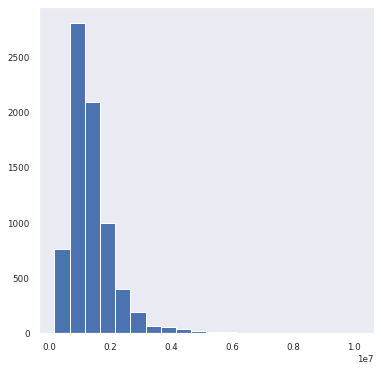

In [1892]:
train_df_copy['Annual Income'].hist(figsize=(6,6), bins=20, grid=False)
train_df_copy['Annual Income'].value_counts()

In [1893]:
train_df_copy.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7.500000e+03,7500.000000,7500.0000,7500.000000,7.500000e+03,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,5943.000000,7500.000000
mean,1.372448e+06,0.030133,10.4666,18.283380,5.370713e+05,0.170000,0.116933,1.187318e+07,228389.589933,16554.986933,1151.087498,0.281733
std,8.072867e+05,0.271604,3.8784,6.956078,3.489979e+05,0.498598,0.346904,3.192612e+07,154812.860292,8766.871287,1604.451418,0.449874
min,1.645970e+05,0.000000,2.0000,4.000000,0.000000e+00,0.000000,0.000000,1.124200e+04,0.000000,0.000000,585.000000,0.000000
25%,8.699482e+05,0.000000,8.0000,13.500000,2.727560e+05,0.000000,0.000000,1.801690e+05,109976.750000,9956.500000,711.000000,0.000000
50%,1.201345e+06,0.000000,10.0000,17.000000,4.573800e+05,0.000000,0.000000,3.095730e+05,194697.750000,15501.500000,731.000000,0.000000
75%,1.637864e+06,0.000000,13.0000,21.800000,7.274822e+05,0.000000,0.000000,5.198820e+05,315780.000000,22159.250000,743.000000,1.000000
max,1.014934e+07,7.000000,20.0000,50.000000,1.706320e+06,7.000000,4.000000,1.000000e+08,681549.000000,40546.000000,7510.000000,1.000000


In [1894]:
#train_df_copy=preprocess_outlier(train_df_copy, "Credit Score", qntl=train_df_copy["Credit Score"].quantile(0.95) )
#train_df_copy['Credit Score'].isna().sum()
#test_df_copy=preprocess_outlier(test_df_copy, "Credit Score", qntl=train_df_copy["Credit Score"].quantile(0.95) )
#test_df_copy['Credit Score'].isna().sum()

Заполним пропуски в признаке 'Credit Score'

In [1895]:

train_df_copy['Credit Score'].interpolate(method='values',  inplace=True, limit_direction=None)
test_df_copy['Credit Score'].interpolate(method='values',  inplace=True, limit_direction=None)
test_df_copy['Credit Score'].fillna(test_df_copy['Credit Score'].median(), inplace=True)

740.000000     194
747.000000     175
742.000000     167
741.000000     165
748.000000     163
              ... 
3936.000000      1
3969.500000      1
3882.500000      1
709.333333       1
4091.000000      1
Name: Credit Score, Length: 681, dtype: int64

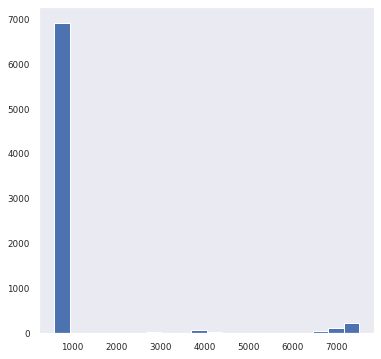

In [1896]:
train_df_copy['Credit Score'].hist(figsize=(6,6), bins=20, grid=False)
train_df_copy['Credit Score'].value_counts()

In [1897]:
train_df_copy.isna().sum()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
Credit Default               0
dtype: int64

In [1898]:
test_df_copy.isna().sum()

Home Ownership               0
Annual Income                0
Years in current job         0
Tax Liens                    0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Bankruptcies                 0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Monthly Debt                 0
Credit Score                 0
dtype: int64

In [1899]:
train_df_copy.loc[train_df_copy['Current Loan Amount'].isna(), 'Current Loan Amount']=train_df_copy['Current Loan Amount'].median()
test_df_copy.loc[test_df_copy['Current Loan Amount'].isna(), 'Current Loan Amount']=test_df_copy['Current Loan Amount'].median()

In [1900]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   Years in current job       7500 non-null   object 
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

In [1901]:
train_df_copy.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7.500000e+03,7500.000000,7500.0000,7500.000000,7.500000e+03,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.372448e+06,0.030133,10.4666,18.283380,5.370713e+05,0.170000,0.116933,1.187318e+07,228389.589933,16554.986933,1141.633933,0.281733
std,8.072867e+05,0.271604,3.8784,6.956078,3.489979e+05,0.498598,0.346904,3.192612e+07,154812.860292,8766.871287,1517.454865,0.449874
min,1.645970e+05,0.000000,2.0000,4.000000,0.000000e+00,0.000000,0.000000,1.124200e+04,0.000000,0.000000,585.000000,0.000000
25%,8.699482e+05,0.000000,8.0000,13.500000,2.727560e+05,0.000000,0.000000,1.801690e+05,109976.750000,9956.500000,712.000000,0.000000
50%,1.201345e+06,0.000000,10.0000,17.000000,4.573800e+05,0.000000,0.000000,3.095730e+05,194697.750000,15501.500000,731.000000,0.000000
75%,1.637864e+06,0.000000,13.0000,21.800000,7.274822e+05,0.000000,0.000000,5.198820e+05,315780.000000,22159.250000,742.000000,1.000000
max,1.014934e+07,7.000000,20.0000,50.000000,1.706320e+06,7.000000,4.000000,1.000000e+08,681549.000000,40546.000000,7510.000000,1.000000


In [1902]:
test_df_copy.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000
mean,1.375404e+06,0.035200,10.542600,18.325920,5.416651e+05,0.162000,0.106800,1.215572e+07,226783.639000,16620.243400,1222.507800
std,8.948010e+05,0.386291,3.850515,7.254659,3.576637e+05,0.559894,0.356994,3.226097e+07,154152.601098,8777.872087,1644.381318
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,1.542200e+04,0.000000,93.000000,585.000000
25%,8.738908e+05,0.000000,8.000000,13.400000,2.743070e+05,0.000000,0.000000,1.871265e+05,107122.000000,9814.500000,711.000000
50%,1.207612e+06,0.000000,10.000000,17.000000,4.578090e+05,0.000000,0.000000,3.223660e+05,195177.500000,15915.500000,730.000000
75%,1.629307e+06,0.000000,13.000000,22.100000,7.255930e+05,0.000000,0.000000,5.225825e+05,318976.750000,22855.500000,743.000000
max,1.497561e+07,15.000000,20.000000,53.400000,1.773200e+06,15.000000,5.000000,1.000000e+08,669085.000000,39148.000000,7480.000000


**Обработка категориальных признаков**

In [1903]:
for cat_colname in train_df_copy.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

Заменим в признаке 'Years in current job" значения на одноименные числовые, предварительно объедиим значения нескольких признаков в один (на основе анализа категориальных признаков - ниже в блокноте)

In [1904]:
def change_job_years(df):
    df.loc[df['Years in current job'].isin(['2 years', '3 years']),'Years in current job'] = '3 years'
    df.loc[df['Years in current job'].isin(['< 1 year', '1 year', '4 years', '5 years']),'Years in current job'] = '4 years'
   
    return df
train_df_copy = change_job_years(train_df_copy)
test_df_copy = change_job_years(test_df_copy)

In [1905]:
train_df_copy['Years in current job'].unique()

array(['10+ years', '8 years', '6 years', '7 years', '4 years', '3 years',
       '9 years'], dtype=object)

In [1906]:
year_job_numbers={'Years in current job':{'3 years': 1, '4 years': 2, 
                                           '6 years': 3, 
                                          '7 years': 4, '8 years': 5, '9 years': 6, '10+ years': 7 }}
train_df_copy=train_df_copy.replace(year_job_numbers)
test_df_copy=test_df_copy.replace(year_job_numbers)

In [1907]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   Years in current job       7500 non-null   int64  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

Заменим в признаках 'Home Ownership', "Term" категории по принципу one hot encoding, добавим новые признаки к существующей таблице

In [1908]:
train_df_copy = pd.concat([train_df_copy, pd.get_dummies(train_df_copy['Home Ownership'])], axis=1)
test_df_copy=pd.concat([test_df_copy, pd.get_dummies(test_df_copy['Home Ownership'])], axis=1)

In [1909]:
train_df_copy = pd.concat([train_df_copy, pd.get_dummies(train_df_copy['Term'])], axis=1)
test_df_copy=pd.concat([test_df_copy, pd.get_dummies(test_df_copy['Term'])], axis=1)

Заменим значения признака Purpose на категориальные, предварительно объединив некоторые признаки в один (на основе анализа распределения категориальных признаков - ниже в блокноте)

In [1910]:
def change_purpose(df):
    df.loc[df['Purpose'].isin(['vacation', 'moving']),'Purpose'] = 'vacation'
    df.loc[df['Purpose'].isin(['buy house', 'major purchases', 'take a trip']),'Purpose'] = 'major purchases'
    df.loc[df['Purpose'].isin(['home improvements', 'other']),'Purpose'] = 'other'
    return df
train_df_copy = change_purpose(train_df_copy)
test_df_copy = change_purpose(test_df_copy)

In [1911]:
train_df_copy['Purpose'].unique()

array(['debt consolidation', 'other', 'major purchases', 'buy a car',
       'small business', 'business loan', 'wedding',
       'educational expenses', 'medical bills', 'vacation',
       'major purchase', 'renewable energy'], dtype=object)

In [1912]:
train_df_copy["Purpose_cat"]=train_df_copy['Purpose'].astype('category').cat.codes
test_df_copy["Purpose_cat"]=test_df_copy['Purpose'].astype('category').cat.codes

Добавим признак медианного кредитного рейтинга в зависимости от цели покупки

In [1913]:
med_loan_by_purpose_tr = train_df_copy.groupby(['Purpose'], as_index=False).agg({'Credit Score': 'median'}).\
                                     rename(columns={'Credit Score': 'CreditScorePurpose'})
med_loan_by_purpose_ts = test_df_copy.groupby(['Purpose'], as_index=False).agg({'Credit Score': 'median'}).\
                                            rename(columns={'Credit Score':'CreditScorePurpose'})
med_loan_by_purpose_tr.head(16)

,Purpose,CreditScorePurpose
0,business loan,725.666667
1,buy a car,739.000000
2,debt consolidation,731.000000
3,educational expenses,734.500000
4,major purchase,731.500000
5,major purchases,720.000000
6,medical bills,720.000000
7,other,729.000000
8,renewable energy,729.500000
9,small business,715.500000


Добавим признак медианного дохода, в зависимости от лет стажа

In [1914]:
sore_job_tr = train_df_copy.groupby(['Years in current job'], as_index=False).agg({'Annual Income': 'median'}).\
                                     rename(columns={'Annual Income': 'JobYearsIncome'})
score_job_ts = test_df_copy.groupby(['Years in current job'], as_index=False).agg({'Annual Income': 'median'}).\
                                            rename(columns={'Annual Income':'JobYearsIncome'})
sore_job_tr.head(10)

,Years in current job,JobYearsIncome
0,1,1162686.00
1,2,1134124.25
2,3,1164576.50
3,4,1182968.50
4,5,1212086.00
5,6,1221054.00
6,7,1266255.00


In [1915]:
train_df_copy = train_df_copy.merge(med_loan_by_purpose_tr, on=['Purpose'], how='left')
test_df_copy = test_df_copy.merge(med_loan_by_purpose_ts, on=['Purpose'], how='left')

In [1916]:
train_df_copy = train_df_copy.merge(sore_job_tr, on=['Years in current job'], how='left')
test_df_copy = test_df_copy.merge(score_job_ts, on=['Years in current job'], how='left')

In [1917]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   Years in current job       7500 non-null   int64  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

In [1918]:
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             2500 non-null   object 
 1   Annual Income              2500 non-null   float64
 2   Years in current job       2500 non-null   int64  
 3   Tax Liens                  2500 non-null   float64
 4   Number of Open Accounts    2500 non-null   float64
 5   Years of Credit History    2500 non-null   float64
 6   Maximum Open Credit        2500 non-null   float64
 7   Number of Credit Problems  2500 non-null   float64
 8   Bankruptcies               2500 non-null   float64
 9   Purpose                    2500 non-null   object 
 10  Term                       2500 non-null   object 
 11  Current Loan Amount        2500 non-null   float64
 12  Current Credit Balance     2500 non-null   float64
 13  Monthly Debt               2500 non-null   float

**Изучение признаков**

In [1919]:
from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency


%matplotlib inline

In [1920]:
TARGET_NAME = 'Credit Default'
Missing_Value='Months since last delinquent'
BASE_FEATURE_NAMES = train_df.columns.drop([TARGET_NAME]+[Missing_Value]).tolist()
NEW_FEATURE_NAMES = train_df_copy.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()


In [1921]:
NEW_FEATURE_NAMES

['Have Mortgage',
 'Home Mortgage',
 'Own Home',
 'Rent',
 'Long Term',
 'Short Term',
 'Purpose_cat',
 'CreditScorePurpose',
 'JobYearsIncome']

In [1922]:
NUM_FEATURE_NAMES=train_df_copy.select_dtypes(include='float64').columns.tolist()
NUM_FEATURE_NAMES

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'CreditScorePurpose',
 'JobYearsIncome']

In [1923]:
CAT_FEATURE_NAMES=['Purpose', 'Term', 'Home Ownership','Years in current job']
CAT_FEATURE_NAMES

['Purpose', 'Term', 'Home Ownership', 'Years in current job']

Построим график корреляции признаков с целевым признаком

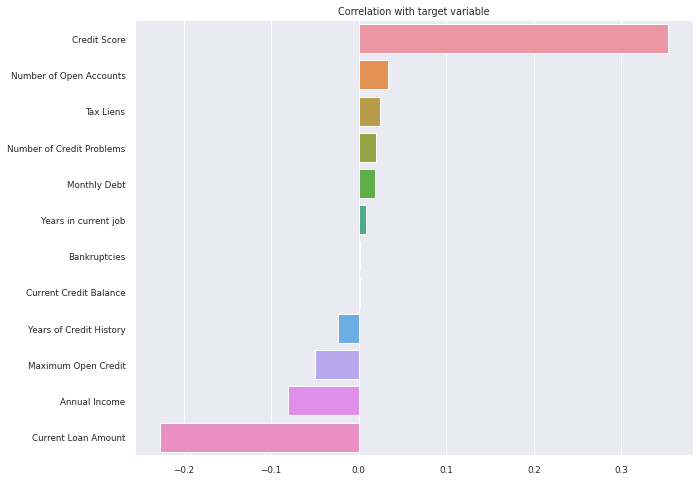

In [1924]:
corr_with_target = train_df_copy[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Из графика видно, что признак Credit Score имеет наибольшую корреляцию с целевым признаком: посмотрим на графике распределение данного признака по двум значениям целевой переменной

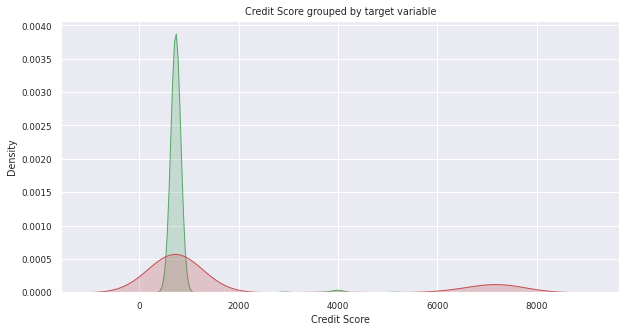

In [1925]:
creditSc_with_target = train_df_copy[['Credit Score', TARGET_NAME]]
creditSc=creditSc_with_target['Credit Score']
creditSc_target_0 = creditSc[creditSc_with_target[TARGET_NAME] == 0]
creditSc_target_1 = creditSc[creditSc_with_target[TARGET_NAME] == 1]
plt.figure(figsize=(10, 5))

sns.kdeplot(creditSc_target_0, shade=True, label='Нет просрочки', color='g')
sns.kdeplot(creditSc_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by target variable')
plt.show()

Судя по графику, распределения признака Credit Score различаются, в зависимости от значения целевой переменной 0 или 1. Значит имеет смысл использовать данный признак в анализе

Проверим распределения вещественных признаков на трейне и тесте

In [1926]:
train_df_copy[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Annual Income
MannwhitneyuResult(statistic=9348558.5, pvalue=0.416241768246373)


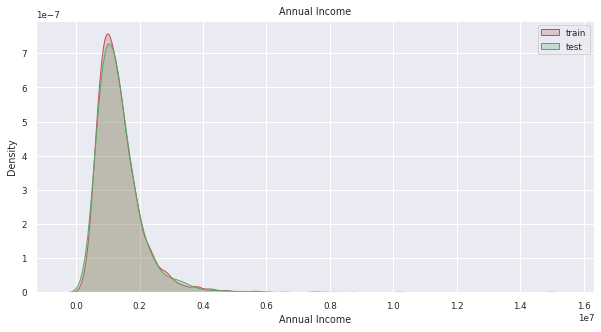

Tax Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


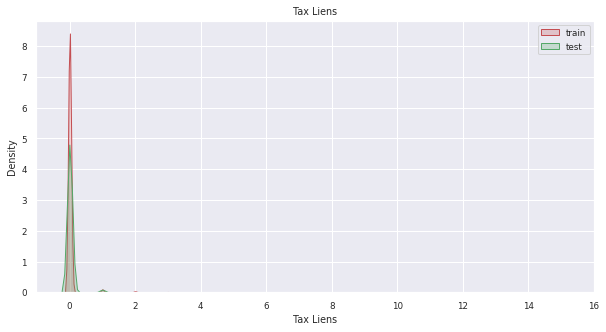

Number of Open Accounts
MannwhitneyuResult(statistic=9259488.0, pvalue=0.1770719228787978)


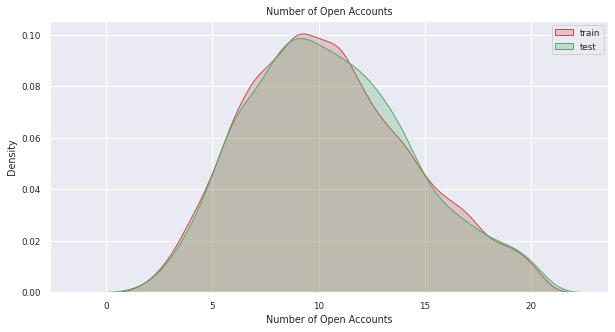

Years of Credit History
MannwhitneyuResult(statistic=9347196.5, pvalue=0.41199467268646794)


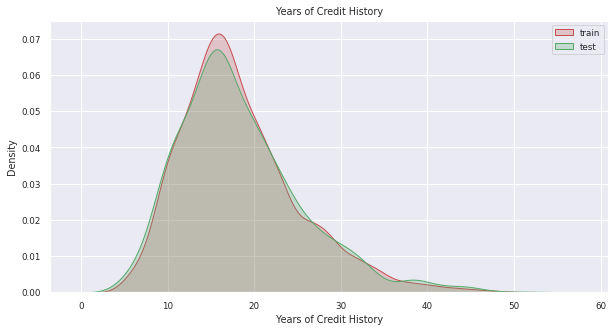

Maximum Open Credit
MannwhitneyuResult(statistic=9357322.0, pvalue=0.44377185637399674)


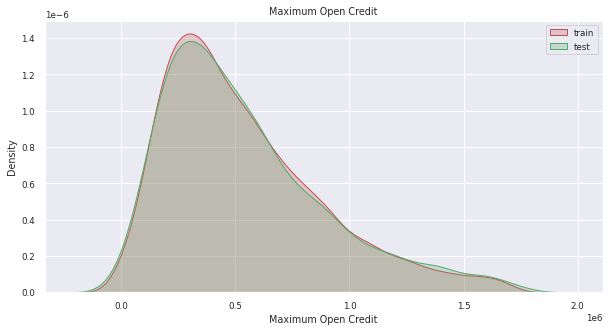

Number of Credit Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


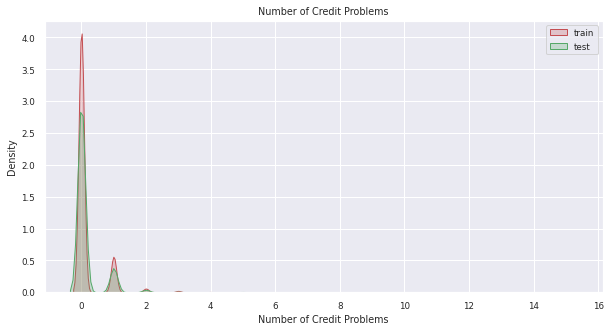

Bankruptcies
MannwhitneyuResult(statistic=9260973.0, pvalue=0.04432950519761078)


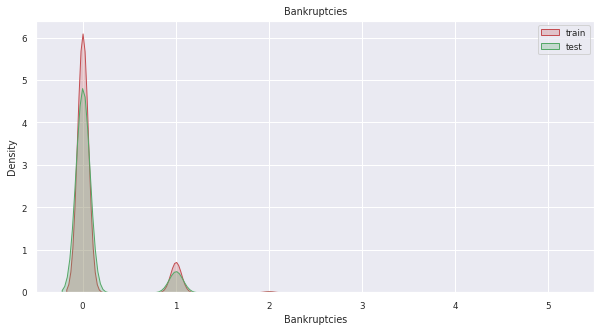

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


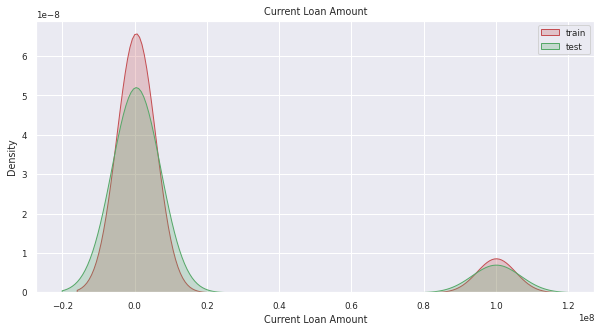

Current Credit Balance
MannwhitneyuResult(statistic=9317902.5, pvalue=0.3239242145427865)


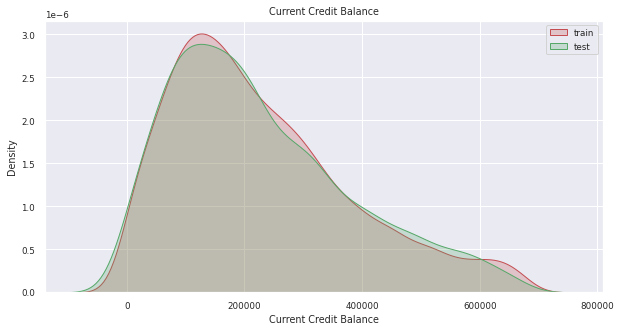

Monthly Debt
MannwhitneyuResult(statistic=9274392.5, pvalue=0.2104630015798365)


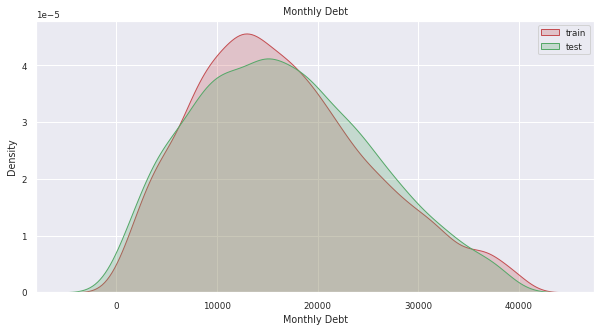

Credit Score
MannwhitneyuResult(statistic=9359423.5, pvalue=0.45041494031683765)


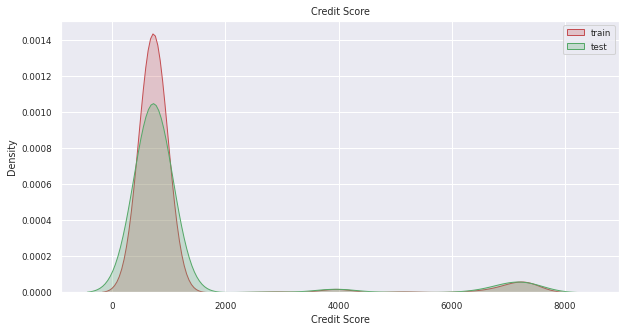

CreditScorePurpose
MannwhitneyuResult(statistic=9077235.5, pvalue=0.00038916667744900985)


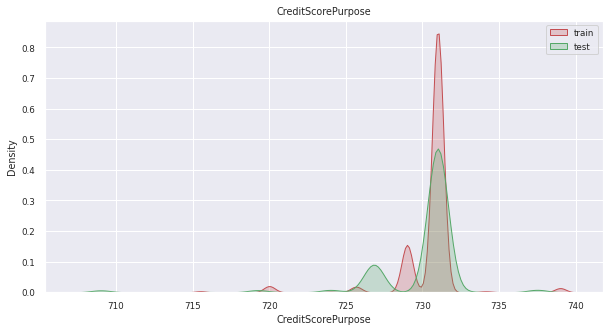

JobYearsIncome
MannwhitneyuResult(statistic=8871770.0, pvalue=2.1409718251027408e-05)


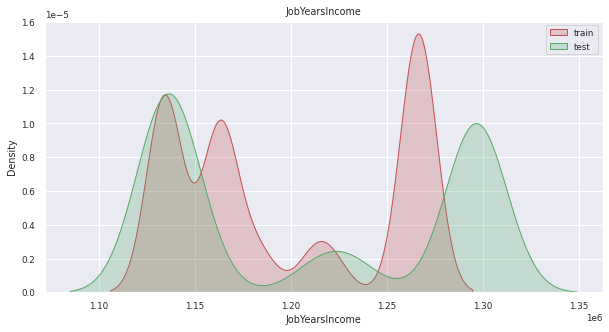

In [1927]:
figsize = (10, 5)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train_df_copy[col], shade=True, label='train', color='r')
    sns.kdeplot(test_df_copy[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(train_df_copy[col], test_df_copy[col]))
    plt.legend()
    plt.title(col)
    plt.show()

Признаки  Bankrupcies, JobYearIncome, CreditScorePurpose имеют pvalue<0.5 ,  различное распределение на  test/train.

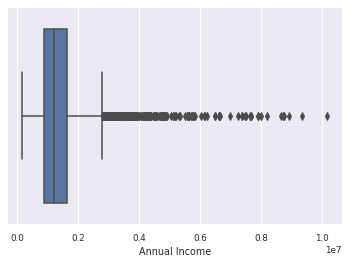

In [1928]:

sns.boxplot(x=train_df_copy['Annual Income'])
plt.show()

**Проверим распределение категориальных признаков train/test**

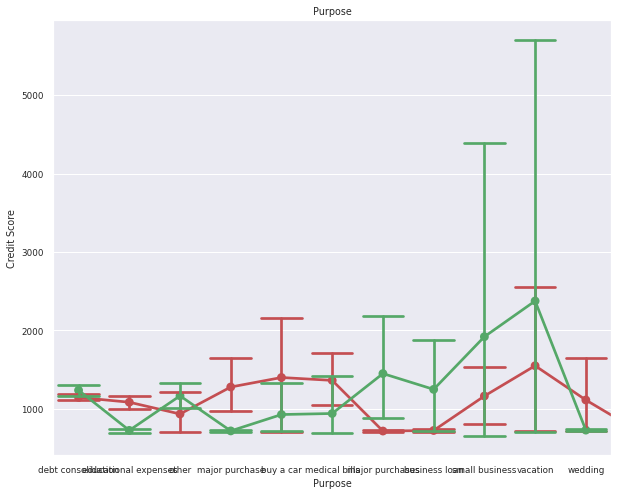

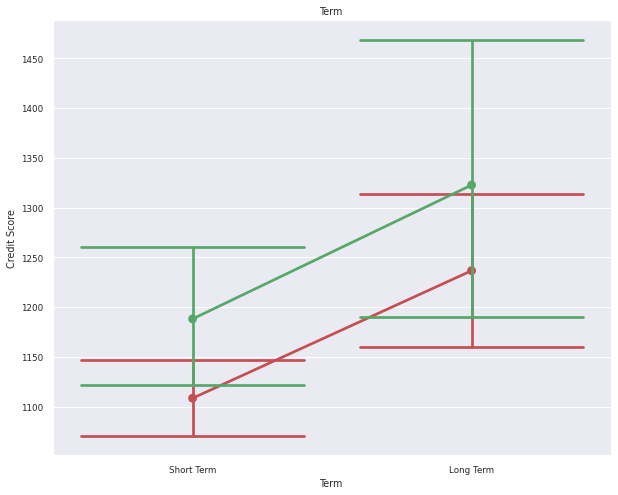

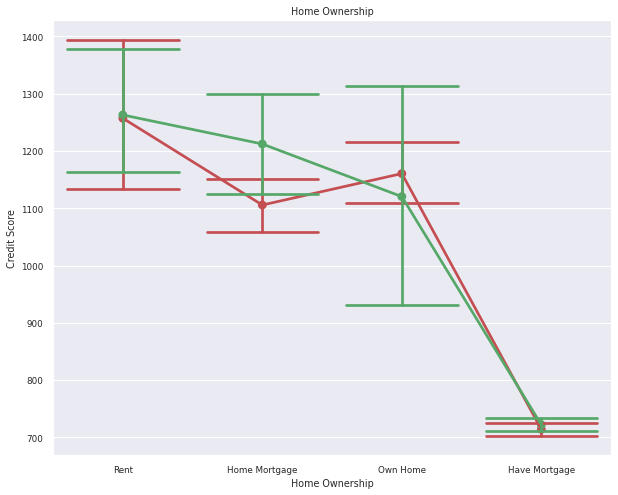

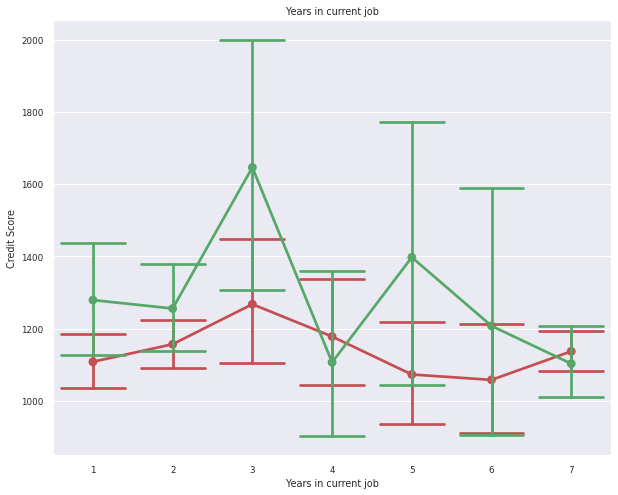

In [1929]:
num_feature = 'Credit Score'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=(10,8))
    sns.pointplot(x=col, y=num_feature, data=train_df_copy, capsize=.8, label='train', color='r' )
    sns.pointplot(x=col, y=num_feature, data=test_df_copy, capsize=.8, label='test', color='g')
    plt.title(col) 
    plt.show()

Судя по грфику, присутсвует неравномерное распределение некоторых категорий в признаке Purpose в train/test

In [1930]:
#num_feature = 'Current Credit Balance'
#for col in CAT_FEATURE_NAMES:
    #plt.figure(figsize=(8,10))
    #sns.pointplot(x=num_feature, y=col, data=train_df_copy, capsize=.8, label='train', color='r' )
    #sns.pointplot(x=num_feature, y=col, data=test_df_copy, capsize=.8, label='test', color='g')
    #plt.title(col) 
    #plt.show()

In [1931]:
train_df_copy.Purpose.unique()

array(['debt consolidation', 'other', 'major purchases', 'buy a car',
       'small business', 'business loan', 'wedding',
       'educational expenses', 'medical bills', 'vacation',
       'major purchase', 'renewable energy'], dtype=object)

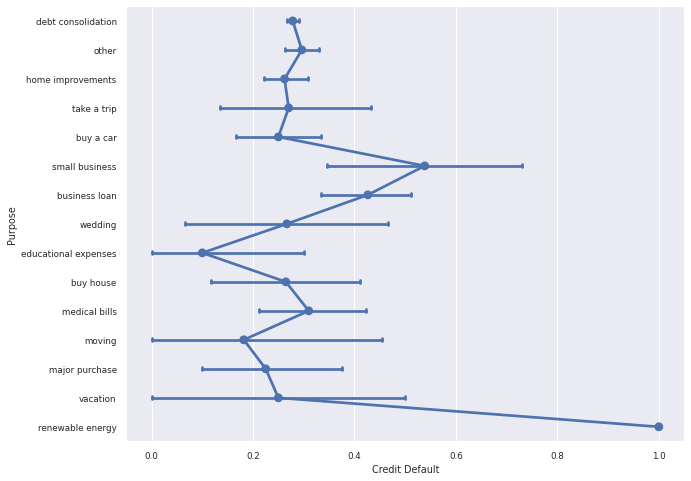

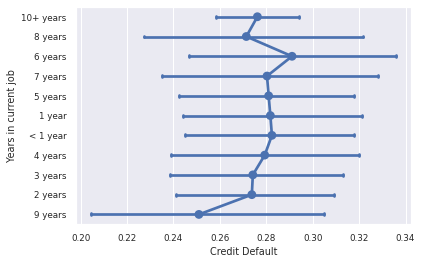

In [1932]:
plt.figure(figsize=(10, 8))
Target_feature='Credit Default'
Cat_features=['Purpose','Years in current job']
for col in Cat_features:
  sns.pointplot(x='Credit Default', y=col, data=train_df, capsize=.1,)
  plt.show()


Можно объединить признаки Purpose:(vacation, moving), (buy house, major purchases, take a trip), (home improvements other)
Years in current job: (<1, 1,  4, 5), (2,3)

In [1933]:
train_df_copy.Purpose.unique()

array(['debt consolidation', 'other', 'major purchases', 'buy a car',
       'small business', 'business loan', 'wedding',
       'educational expenses', 'medical bills', 'vacation',
       'major purchase', 'renewable energy'], dtype=object)

In [1934]:
train_df_copy['Years in current job'].unique()

array([7, 5, 3, 4, 2, 1, 6])

**Построение модели**

In [1935]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [1936]:
def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [1937]:
def balance_df_by_target(df, target_name, method='over'):

    assert method in ['over', 'under', 'tomek', 'smote'], 'Неверный метод сэмплирования'
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1
    if method == 'over':
        for i in range(disbalance_coeff):
            sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            df = df.append(sample, ignore_index=True)
            
    elif method == 'under':
        df_ = df.copy()
        df = df_[df_[target_name] == minor_class_name]
        tmp = df_[df_[target_name] == major_class_name]
        df = df.append(tmp.iloc[
            np.random.randint(0, tmp.shape[0], target_counts[minor_class_name])
        ], ignore_index=True)

    elif method == 'tomek':
        from imblearn.under_sampling import TomekLinks
        tl = TomekLinks()
        X_tomek, y_tomek = tl.fit_resample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_tomek, y_tomek], axis=1)
    
    elif method == 'smote':
        from imblearn.over_sampling import SMOTE
        smote = SMOTE()
        X_smote, y_smote = smote.fit_resample(df.drop(columns=target_name), df[target_name])
        df = pd.concat([X_smote, y_smote], axis=1)

    return df.sample(frac=1) 

In [1938]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()


In [1939]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [1940]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [1941]:
train_df_copy[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [1942]:
SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES +  NEW_FEATURE_NAMES
SELECTED_FEATURE_NAMES=set(SELECTED_FEATURE_NAMES)
SELECTED_FEATURE_NAMES

{'Annual Income',
 'Bankruptcies',
 'Credit Score',
 'CreditScorePurpose',
 'Current Credit Balance',
 'Current Loan Amount',
 'Have Mortgage',
 'Home Mortgage',
 'JobYearsIncome',
 'Long Term',
 'Maximum Open Credit',
 'Monthly Debt',
 'Number of Credit Problems',
 'Number of Open Accounts',
 'Own Home',
 'Purpose_cat',
 'Rent',
 'Short Term',
 'Tax Liens',
 'Years of Credit History'}

In [1943]:
SELECTED_FEATURE_NAMES=['Annual Income',
 'Bankruptcies',
 'Credit Score',
 'CreditScorePurpose',
 'Current Credit Balance',
 'Current Loan Amount',
 'Have Mortgage',
 'Home Mortgage',
 'JobYearsIncome',
 'Long Term',
 'Maximum Open Credit',
 'Monthly Debt',
 'Number of Credit Problems',
 'Number of Open Accounts',
 'Own Home',
 'Purpose_cat',
 'Rent',
 'Short Term',
 'Tax Liens',
 'Years of Credit History']

**Разбиение на Train /Test**

In [1944]:
X = train_df_copy[SELECTED_FEATURE_NAMES]
y = train_df_copy[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y
                                                   )

display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

0    0.718286
1    0.281714
Name: Credit Default, dtype: float64

0    0.718222
1    0.281778
Name: Credit Default, dtype: float64

Проведем стандартизацию вещественных признаков для линейных моделей

In [1945]:
scaler = StandardScaler()

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

#X_train[NUM_FEATURE_NAMES] = scaler.fit_transform(X_train_norm[NUM_FEATURE_NAMES])
#X_test[NUM_FEATURE_NAMES] = scaler.transform(X_test_norm[NUM_FEATURE_NAMES])
X_train[SELECTED_FEATURE_NAMES] = scaler.fit_transform(X_train_norm[SELECTED_FEATURE_NAMES])
X_test[SELECTED_FEATURE_NAMES] = scaler.transform(X_test_norm[SELECTED_FEATURE_NAMES])

Проведем баллансировку классов по методу 'oversampling'

In [1946]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [1947]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [1948]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

1.2748478701825559

**Построение базовых моделей**

In [1949]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

evaluate_preds(model_lr, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      3771
           1       0.69      0.51      0.59      2958

    accuracy                           0.68      6729
   macro avg       0.68      0.66      0.66      6729
weighted avg       0.68      0.68      0.67      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1616
           1       0.49      0.48      0.49       634

    accuracy                           0.71      2250
   macro avg       0.65      0.64      0.65      2250
weighted avg       0.71      0.71      0.71      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1300  316
1                327  307


In [1950]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

evaluate_preds(model_knn, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3771
           1       0.79      0.73      0.76      2958

    accuracy                           0.79      6729
   macro avg       0.79      0.79      0.79      6729
weighted avg       0.79      0.79      0.79      6729

TEST

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1616
           1       0.43      0.47      0.45       634

    accuracy                           0.67      2250
   macro avg       0.61      0.61      0.61      2250
weighted avg       0.68      0.67      0.68      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1214  402
1                335  299


In [1951]:
model_tree = DecisionTreeClassifier(random_state=21,
                                    class_weight={0:1, 1:disbalance},
                                    max_depth=4
                                    )
model_tree.fit(X_train, y_train)

evaluate_preds(model_tree, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.85      0.76      3771
           1       0.72      0.49      0.58      2958

    accuracy                           0.69      6729
   macro avg       0.70      0.67      0.67      6729
weighted avg       0.70      0.69      0.68      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1616
           1       0.53      0.47      0.50       634

    accuracy                           0.73      2250
   macro avg       0.66      0.65      0.66      2250
weighted avg       0.72      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1349  267
1                337  297


In [1952]:
model_xgb = xgb.XGBClassifier(random_state=21, 
                               n_estimators=100
                             )
model_xgb.fit(X_train, y_train)

evaluate_preds(model_xgb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.72      0.86      0.79      3771
           1       0.76      0.58      0.66      2958

    accuracy                           0.74      6729
   macro avg       0.74      0.72      0.72      6729
weighted avg       0.74      0.74      0.73      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1616
           1       0.52      0.50      0.51       634

    accuracy                           0.73      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1323  293
1                318  316


In [1953]:
model_lgbm = lgbm.LGBMClassifier(random_state=21, 
                                 class_weight={0:1, 1:disbalance},
                                 n_estimators=10
                                )
model_lgbm.fit(X_train, y_train)

evaluate_preds(model_lgbm, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3771
           1       0.71      0.73      0.72      2958

    accuracy                           0.75      6729
   macro avg       0.75      0.75      0.75      6729
weighted avg       0.75      0.75      0.75      6729

TEST

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1616
           1       0.45      0.60      0.52       634

    accuracy                           0.68      2250
   macro avg       0.64      0.66      0.64      2250
weighted avg       0.72      0.68      0.69      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1152  464
1                252  382


In [1954]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

evaluate_preds(model_catb, X_train, X_test, y_train, y_test)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3771
           1       0.93      0.85      0.89      2958

    accuracy                           0.91      6729
   macro avg       0.91      0.90      0.91      6729
weighted avg       0.91      0.91      0.91      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1616
           1       0.52      0.47      0.49       634

    accuracy                           0.73      2250
   macro avg       0.66      0.65      0.66      2250
weighted avg       0.72      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1348  268
1                338  296


**Подбор гиперпараметров**

model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

model_xgb = xgb.XGBClassifier(random_state=21, 
                               n_estimators=100
                             )


In [1955]:
params = {'n_estimators':[50, 100, 200, 500, 700], 
          'max_depth':[3, 5, 7, 10, 13],
          'learning_rate':[0.001, 0.01, 0.05, 0.1]}

In [1956]:
cv = StratifiedKFold(n_splits=3, random_state=21, shuffle=True)

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}  -randomize XGB best params

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500} - griedsearch XGB best params


In [1957]:
#rs = GridSearchCV(model_lgbm, params, scoring='f1', cv=cv, n_jobs=-1)
#rs.fit(X_train, y_train)

In [1958]:
#rs.best_params_

In [1959]:
#rs.best_score_

In [1960]:
#rs = GridSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
#rs.fit(X_train, y_train)

In [1961]:
#rs.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500} - catb best params

In [1962]:
#rs.best_score_

In [1963]:
#final_model = xgb.XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, silent=True, random_state=21)
                                
                               
#final_model = lgbm.LGBMClassifier(n_estimators=200, max_depth=3, class_weight={0:1, 1:disbalance}, silent=True, random_state=21)
final_model = catb.CatBoostClassifier(n_estimators=700, max_depth=3, learning_rate=0.05, silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      3771
           1       0.81      0.69      0.75      2958

    accuracy                           0.79      6729
   macro avg       0.80      0.78      0.79      6729
weighted avg       0.80      0.79      0.79      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1616
           1       0.51      0.50      0.50       634

    accuracy                           0.72      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.72      0.72      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1313  303
1                318  316


In [1964]:
cv_score = cross_val_score(final_model, X_train, y_train, scoring='f1', cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.64474394, 0.66262404, 0.67118644])

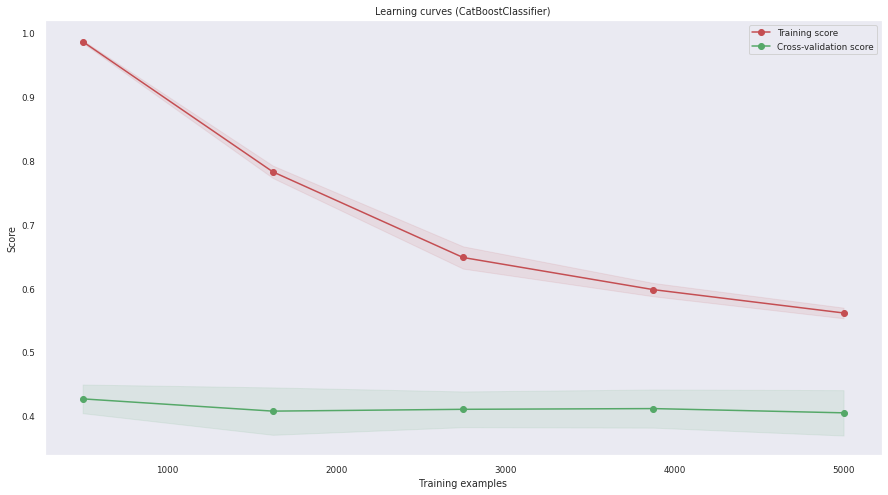

In [1965]:
show_learning_curve_plot(final_model, X, y)

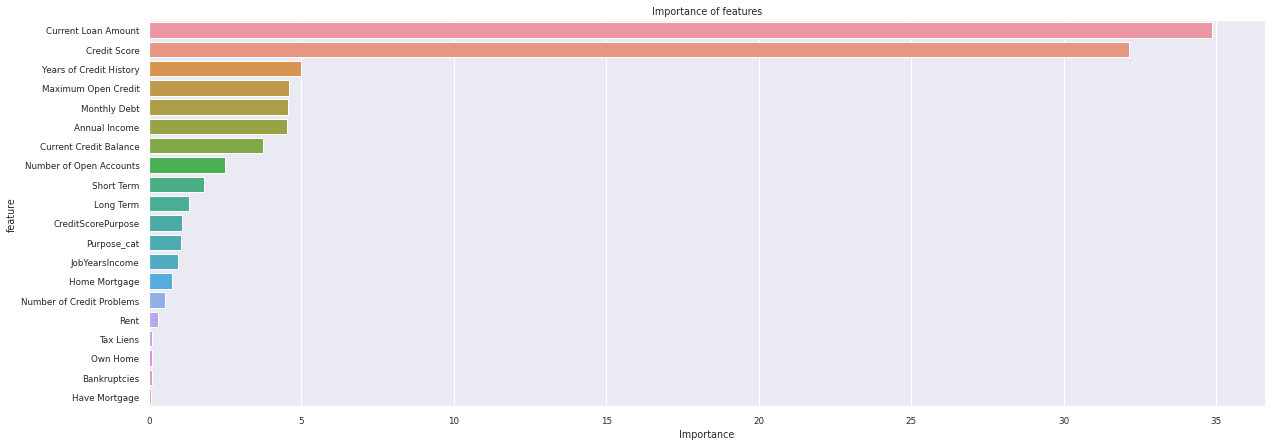

In [1966]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=18)

In [1967]:
important_features_top

['Current Loan Amount',
 'Credit Score',
 'Years of Credit History',
 'Maximum Open Credit',
 'Monthly Debt',
 'Annual Income',
 'Current Credit Balance',
 'Number of Open Accounts',
 'Short Term',
 'Long Term',
 'CreditScorePurpose',
 'Purpose_cat',
 'JobYearsIncome',
 'Home Mortgage',
 'Number of Credit Problems',
 'Rent',
 'Tax Liens',
 'Own Home']

In [1968]:
important_features_top=['Current Loan Amount',
 'Credit Score',
 'Years of Credit History',
 'Monthly Debt',
 'Maximum Open Credit',
 'Annual Income',
 'Current Credit Balance',
 'Number of Open Accounts',
 'Short Term',
 'Long Term',
 #'CreditScorePurpose',
 'Purpose_cat',
 #'JobYearsIncome',
 'Home Mortgage',
 'Number of Credit Problems',
 'Rent', 
 'Own Home', 
 'Tax Liens',
 'Bankruptcies'
  ]

In [1969]:
#final_model = xgb.XGBClassifier(n_estimators=700, max_depth=3, learning_rate=0.1,  silent=True, random_state=21)
#final_model = lgbm.LGBMClassifier(n_estimators=200, max_depth=3, class_weight={0:1, 1:disbalance}, silent=True, random_state=21)
final_model = catb.CatBoostClassifier(n_estimators=900,   max_depth=3,  learning_rate=0.05, silent=True, random_state=21)#class_weights=[1, disbalance]

final_model.fit(X_train[important_features_top], y_train)
y_train_pred = final_model.predict(X_train[important_features_top])
y_test_pred = final_model.predict(X_test[important_features_top])
y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      3771
           1       0.84      0.72      0.77      2958

    accuracy                           0.82      6729
   macro avg       0.82      0.81      0.81      6729
weighted avg       0.82      0.82      0.81      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1616
           1       0.52      0.51      0.52       634

    accuracy                           0.73      2250
   macro avg       0.67      0.66      0.66      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1321  295
1                311  323


In [1970]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [1971]:
submit = pd.read_csv('/content/drive/MyDrive/Тренировочные данные/Scoring model project (classification)/sample_submission.csv')


In [1972]:
test_df_copy.shape

(2500, 24)

In [1973]:
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             2500 non-null   object 
 1   Annual Income              2500 non-null   float64
 2   Years in current job       2500 non-null   int64  
 3   Tax Liens                  2500 non-null   float64
 4   Number of Open Accounts    2500 non-null   float64
 5   Years of Credit History    2500 non-null   float64
 6   Maximum Open Credit        2500 non-null   float64
 7   Number of Credit Problems  2500 non-null   float64
 8   Bankruptcies               2500 non-null   float64
 9   Purpose                    2500 non-null   object 
 10  Term                       2500 non-null   object 
 11  Current Loan Amount        2500 non-null   float64
 12  Current Credit Balance     2500 non-null   float64
 13  Monthly Debt               2500 non-null   float

In [1974]:


#X_train[NUM_FEATURE_NAMES] = scaler.fit_transform(X_train_norm[NUM_FEATURE_NAMES])
#X_test[NUM_FEATURE_NAMES] = scaler.transform(X_test_norm[NUM_FEATURE_NAMES])
#X_train[SELECTED_FEATURE_NAMES] = scaler.fit_transform(X_train_norm[SELECTED_FEATURE_NAMES])
#test_df_copy[SELECTED_FEATURE_NAMES] = scaler.transform(test_df_copy[SELECTED_FEATURE_NAMES])

In [1975]:
#test_df_copy=test_df_copy.drop(["Term", 'Purpose', "Years in current job", "Home Ownership"], axis=1, inplace=True)

In [1976]:
predictions = final_model.predict(test_df_copy[important_features_top])
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [1977]:
submit['Credit Default'] = predictions
submit['Credit Default'].value_counts()

0    1993
1     507
Name: Credit Default, dtype: int64

In [1978]:
submit.to_csv('submit_Credit_defaultProjectCATB27.csv', index=False)